# 第九章 数据聚合与分组运算 

# 主要内容 
# 4.数据透视表

# 透视表

其实在第二章：即引言部分已经提到过pandas的数据透视表功能。DataFrame中有一个pivot_table方法能够实现数据透视表的功能

# 示例1：对小费数据的处理

- ** 对于小费数据集，根据sex和smoker计算分组平均数，并将sex和smoker放到行上**

In [22]:
import pandas as pd
import numpy as np
tips = pd.read_csv('data/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240


In [3]:
tips.pivot_table(index = ['sex', 'smoker'])
# pivot_table的默认聚合类型为计算平均数

size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

pivot_table的参数有
- values: 显示的列的名字，可以应用aggfunc中的函数
- index: 索引
- columns: 可选的， 通过额外的方法来分割你所关心的实际值，然而aggfunc被应用到values上
- aggfunc:聚合函数或函数列表，默认为mean，可以是任何对groupby有效的函数  
- margin：添加行/列小计和总计，默认为False

In [6]:
tips.pivot_table(values = ['tip_pct', 'size'], index=['sex', 'day'],
                 columns='smoker')

tip_pct                size          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   0.165296  0.209129  2.500000  2.000000
       Sat   0.147993  0.163817  2.307692  2.200000
       Sun   0.165710  0.237075  3.071429  2.500000
       Thur  0.155971  0.163073  2.480000  2.428571
Male   Fri   0.138005  0.144730  2.000000  2.125000
       Sat   0.162132  0.139067  2.656250  2.629630
       Sun   0.158291  0.173964  2.883721  2.600000
       Thur  0.165706  0.164417  2.500000  2.300000

* **对smoker添加分项小计**

In [7]:
tips.pivot_table(values = ['tip_pct', 'size'], index=['sex', 'day'],
                 columns='smoker', margins=True)

tip_pct                          size                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   0.165296  0.209129  0.199388  2.500000  2.000000  2.111111
       Sat   0.147993  0.163817  0.156470  2.307692  2.200000  2.250000
       Sun   0.165710  0.237075  0.181569  3.071429  2.500000  2.944444
       Thur  0.155971  0.163073  0.157525  2.480000  2.428571  2.468750
Male   Fri   0.138005  0.144730  0.143385  2.000000  2.125000  2.100000
       Sat   0.162132  0.139067  0.151577  2.656250  2.629630  2.644068
       Sun   0.158291  0.173964  0.162344  2.883721  2.600000  2.810345
       Thur  0.165706  0.164417  0.165276  2.500000  2.300000  2.433333
All          0.159328  0.163196  0.160803  2.668874  2.408602  2.569672

- ** 将其他聚合函数应用于列**  
    可以通过aggfunc传入其他聚合函数

In [8]:
tips.pivot_table(values = 'tip_pct', index=['sex', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
sex    smoker                               
Female No       2.0  13.0  14.0  25.0   54.0
       Yes      7.0  15.0   4.0   7.0   33.0
Male   No       2.0  32.0  43.0  20.0   97.0
       Yes      8.0  27.0  15.0  10.0   60.0
All            19.0  87.0  76.0  62.0  244.0

- ** 填补缺失值**

In [11]:
tips.pivot_table(values = 'size', index=['time', 'sex', 'smoker'],
                 columns='day', aggfunc='sum', fill_value=0)

day                   Fri  Sat  Sun  Thur
time   sex    smoker                     
Dinner Female No        2   30   43     2
              Yes       8   33   10     0
       Male   No        4   85  124     0
              Yes      12   71   39     0
Lunch  Female No        3    0    0    60
              Yes       6    0    0    17
       Male   No        0    0    0    50
              Yes       5    0    0    23

# 交叉表

交叉表是一种用于计算分组频率的特殊数据透视表，DataFrame的cross可以实现，如以下数据

In [19]:
data = pd.read_csv('data/data.csv')

In [20]:
data

,Sample,Gender,Handedness
0,1,Female,Right-handed
1,2,Male,Left-handed
2,3,Female,Right-handed
3,4,Male,Right-handed
4,5,Male,Left-handed
5,6,Male,Right-handed
6,7,Female,Right-handed
7,8,Female,Left-handed
8,9,Male,Right-handed
9,10,Female,Right-handed


- ** 其中Female和Right-handed分别都有两个类别，现在我们使用交叉表进行交叉频数统计**

In [21]:
pd.crosstab(data.Gender, data.Handedness, margins=True)

Handedness,Left-handed,Right-handed,All
Gender,,,
Female,1,4,5
Male,2,3,5
All,3,7,10


# 示例2：2012联邦选举委员会数据

美国联邦选举委员会发布了有关政治竞选方面的数据，包括赞助者姓名、职称
、职业、雇主、地址以及出资额等信息。如下所示，我们将利用目前为止学过的方法对数据进行**描述性分析**。

In [24]:
fec = pd.read_csv('data/P00000001-ALL.csv')
fec.info()

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [25]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


- **这份数据中没有党派信息，我们自己进行添加**

   首先将候选人名单提取出来，利用unique函数

In [26]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

再利用字典说明党派关系

In [27]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

利用map添加党派信息

In [28]:
fec['party'] = fec.cand_nm.map(parties)

In [29]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [30]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

** 1.根据职业和雇主统计赞助信息**

首先我们查看一下数据的职业类型

In [32]:
fec.contbr_occupation.value_counts()

RETIRED                                   234829
INFORMATION REQUESTED                      35176
ATTORNEY                                   34409
HOMEMAKER                                  30199
PHYSICIAN                                  23530
INFORMATION REQUESTED PER BEST EFFORTS     21364
ENGINEER                                   14372
TEACHER                                    13998
CONSULTANT                                 13335
PROFESSOR                                  12565
NOT EMPLOYED                                9842
SALES                                       8357
LAWYER                                      8306
MANAGER                                     8060
PRESIDENT                                   7890
STUDENT                                     7086
OWNER                                       6422
EXECUTIVE                                   5623
SELF-EMPLOYED                               5517
WRITER                                      5137
CEO                 

由以上结果可以看出，职业有非常多种，但是我们知道，许多职业都涉及到相同的基本工作类型，或者说一样东西有很多变体，我们可以对以上职业进行分类。同样，定义一个字典。并利用dict_get，使得没有映射关系的职业也能进行分类。

In [33]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

In [34]:
# 如果没有映射关系，则返回x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

对雇主信息也进行同样的操作

In [35]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

生成数据透视表

In [36]:
by_occupation = fec.pivot_table(values = 'contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')

In [38]:
by_occupation.head()

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


过滤掉总出资额不足200万美元的数据

In [42]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
# 对axis=1进行加总
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11126932.97,7.343540e+06
CEO,2071474.79,3.932686e+06
CONSULTANT,2459812.71,2.472815e+06
ENGINEER,950425.55,1.780102e+06
EXECUTIVE,1355161.05,3.918557e+06
HOMEMAKER,4243394.30,1.324141e+07
INVESTOR,884133.00,2.320349e+06
LAWYER,3159391.87,3.785903e+05
MANAGER,762693.22,1.404878e+06


利用柱状图来展示

In [46]:
%matplotlib inline 
# 将图像直接显示在output中

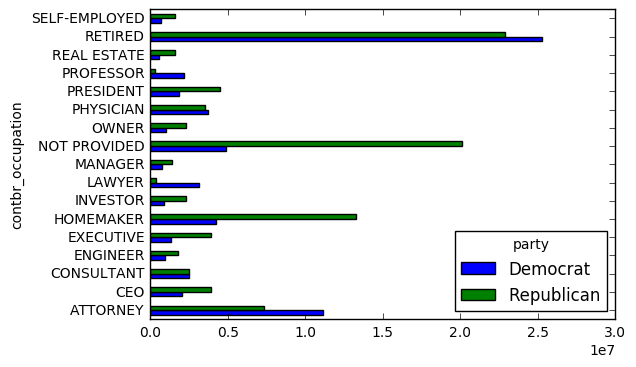

In [45]:
over_2mm.plot(kind='barh')

**了解Obama和Romney总出资额最高的职业和企业**  
首先，我们选出两位候选人的数据，然后根据候选人进行分组，再自定义一个求最大值的聚合函数，运用到分组中

In [48]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

In [49]:
grouped = fec_mrbo.groupby('cand_nm')

In [65]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()

    # 根据key对totals进行降序排列
    return totals.order(ascending=False)[:n]

In [72]:
group1 = grouped.apply(get_top_amounts, 'contbr_occupation', n=7)
group1

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: order is deprecated, use sort_values(...)


cand_nm        contbr_occupation
Obama, Barack  RETIRED              25270507.23
               ATTORNEY             11126932.97
               NOT PROVIDED          4849801.96
               HOMEMAKER             4243394.30
               PHYSICIAN             3732387.44
               LAWYER                3159391.87
               CONSULTANT            2459812.71
Romney, Mitt   RETIRED              11266949.23
               NOT PROVIDED         11173374.84
               HOMEMAKER             8037250.86
               ATTORNEY              5302578.82
               PRESIDENT             2403439.77
               CEO                   2247242.03
               EXECUTIVE             2230653.79
Name: contb_receipt_amt, dtype: float64

In [73]:
group2 = grouped.apply(get_top_amounts, 'contbr_employer', n=10)
group2

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: order is deprecated, use sort_values(...)


cand_nm        contbr_employer   
Obama, Barack  RETIRED               22665902.20
               SELF-EMPLOYED         18584277.16
               NOT EMPLOYED           8584118.70
               NOT PROVIDED           5036178.37
               HOMEMAKER              2599987.04
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
               REFUSED                 149516.07
Romney, Mitt   NOT PROVIDED          11827237.12
               RETIRED               11264701.35
               HOMEMAKER              8037000.86
               SELF-EMPLOYED          7265136.53
               STUDENT                 488642.82
               CREDIT SUISSE           265650.00
               MORGAN STANLEY          262266.00
               GOLDMAN SACH & CO.      233250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      

用图形来表示

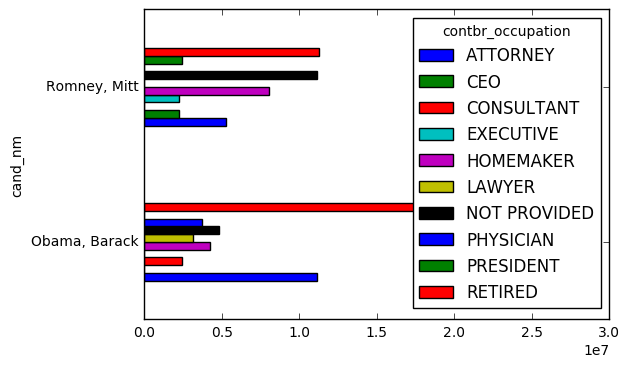

In [71]:
group1.unstack().plot(kind='barh')

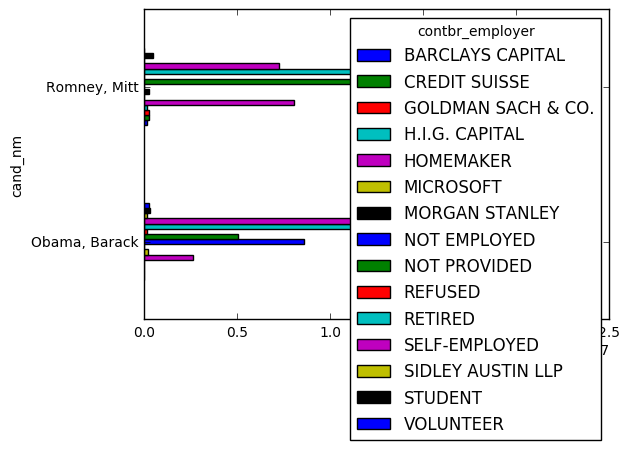

In [74]:
group2.unstack().plot(kind='barh')

** 2.对出资额进行分组**

假如我们想对出资额的大小进行离散化分组

首先定义几个分组，再利用cut函数将出资额的大小划分为几个组

In [76]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels.head()

411      (10, 100]
412    (100, 1000]
413    (100, 1000]
414      (10, 100]
415      (10, 100]
Name: contb_receipt_amt, dtype: category
Categories (8, object): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

然后根据候选人姓名和分组标签label对数据进行分组，统计每组的个数

In [79]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


我们可以看到，在小额赞助方面，Obama比Romney得到的多，还可以利用**图形显示**各位候选人各种赞助额度的比例。

In [81]:
# 对出资额求和
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [82]:
# 用数值除以行的总和
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


绘图显示

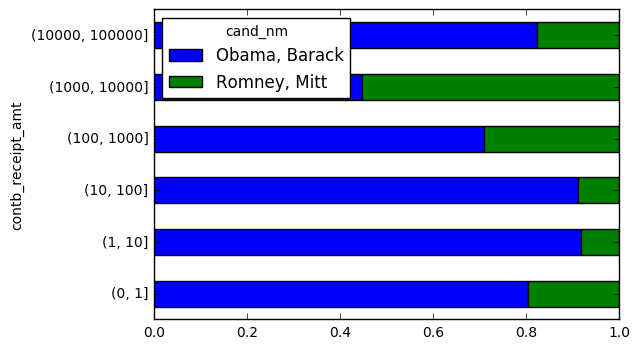

In [83]:
# 将最大的两个标签去掉，因为这些不是由个人捐赠的
normed_sums[:-2].plot(kind='barh', stacked=True)

** 3.根据州统计赞助信息**

首先根据赞助人和州进行分组，然后得到赞助总额，用0填补缺失值，只保留赞助额大于10万美元的州

In [84]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,275353.15,86204.24
AL,537835.48,504882.08
AR,324802.28,105351.50
AZ,1484241.84,1850484.23
CA,23370680.84,10908232.46
CO,2104551.38,1477810.82
CT,2037216.66,3377421.85
DC,4317865.85,999740.50
DE,325394.14,81404.00


得到个候选人在各州总赞助的比例

In [87]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,0.997280,0.002720
AB,1.000000,0.000000
AE,0.883257,0.116743
AK,0.761575,0.238425
AL,0.515802,0.484198
AP,0.957329,0.042671
AR,0.755084,0.244916
AS,1.000000,0.000000
AZ,0.445087,0.554913


我们可以绘制跟第示例2相同的图形

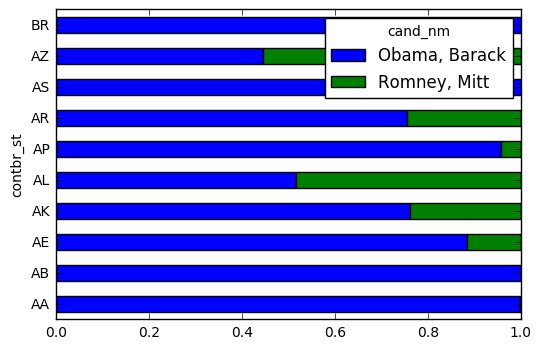

In [89]:
percent[:10].plot(kind='barh', stacked=True)